Tecnicatura superior en Ciencia de Datos, Practicas en Ciencia de Datos, ISPC, 2022.

# Análisis predictorio de pacientes con enfermedades cardiovasculares
#### Por Delgado Agustina

![Heart failure risk prediction](https://i.pinimg.com/564x/3d/d0/2f/3dd02f9920c855e00ed8fa49ef37e47b.jpg)

## Introducción

Las enfermedades cardiovasculares (ECV) con la principal causa de muerte en todo el mundo, según las Estadísticas de enfermedades cardíacas y accidentes cerebrovasculares de la American Heart Association - Actualización 2021. En Argentina, las ECV son la mayor causa de mortalidad con un total de 97.764 de fallecidos, representando el 28,46% de muertes en el país.

En 2019, casi 18,6 millones de personas murieron por ECV. Eso refleja un aumento del 17,1% durante la última década. Hubo más de 523,2 millones de casos de enfermedades cardiovasculares en 2019, un aumento del 26,6% en comparación con 2010. Teniendo en cuenta que aproximadamente 17,9 millones de personas mueren anuelmente por ECV, estas representan el 31 % de todas las muertes en todo el mundo. 

Cuatro de cada 5 muertes por ECV se deben a ataques cardíacos y accidentes cerebrovasculares, y un tercio de estas muertes ocurren prematuramente en personas menores de 70 años. La insuficiencia cardíaca es un evento común causado por ECV y este conjunto de datos contiene 11 características que pueden usarse para predecir una posible enfermedad cardíaca. 

Las personas con enfermedades cardiovasculares o con alto riesgo cardiovascular (por la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección y manejo temprano en el que un modelo de aprendizaje automático puede ser de gran ayuda.

El presente trabajo es un proyecto para el módulo de Análisis de Datos del Instituto Superior Politécnico de Córdoba. Buscaremos predecir qué pacientes pueden tener ECV con un algoritmo de aprendizaje supervisado, el árbol de decisión.

## Modelo a utilizar: Árbol de decisión



Los árboles de decisión son modelos de aprendizaje automático que se utilizan tanto para tareas de clasificación como de regresión, intentando encontrar patrones en las características de los puntos de datos. El árbol presentado en este proyecto tratara de predecir si un paciente tiene una enfermedad cardíaca.

La idea principal de los árboles de decisión es encontrar aquellas variables descriptivas que contienen la mayor cantidad de información con respecto a la clase de salida, y luego dividir el conjunto de datos según los valores de estas variables de modo que los subconjuntos de datos resultantes sean lo más puros posible.

Pero, ¿cómo se crean estos árboles en primer lugar? Los árboles de decisión son modelos de aprendizaje automático supervisados, lo que significa que se crean a partir de un conjunto de entrenamiento de datos etiquetados. El momento de creación del árbol es donde ocurre el aprendizaje del modelo.

Al hacer preguntas como ¿Qué edad tiene el paciente?, ¿Cuál es su nivel de colesterol?, ¿Cuál es su frecuencia cardíaca máxima alcanzada?, el árbol de decisiones intenta obtener una mejor comprensión de sus posibilidades en la próxima prueba.

Observermos el siguiente gráfico de árbol, pero primero dos aclaraciones importantes: 

1. El nodo raíz se identifica como la parte superior del árbol. Esto ya está anotado con el número de muestras y los números en cada clase (es decir, enfermo frente a sano) que se utilizó para construir el árbol.

2. Las divisiones ocurren con Verdadero a la izquierda, Falso a la derecha. Tenga en cuenta que la división correcta es un nodo hoja, es decir que no hay más ramas. Cualquier decisión que termine aquí resulta en la clase mayoritaria.

In [1]:
from wand.image import Image as WImage
img = WImage(filename='jpg_tree.jpg')
img

Podemos ver que comenzamos con todas las muestras del conjunto de entrenamiento en el nodo raíz (Samples = 734), cada uno estos puntos tienen etiquetas. Luego decidimos dividir los datos en grupos más pequeños según una característica. Por ejemplo, las primeras ramas se dividen según la variable St_slope. 

Una vez que tenemos estos subconjuntos, repetimos el proceso: nuevamente dividimos los datos de cada subconjunto en una característica diferente. Finalmente, llegamos a un punto en el que no se puede dividir los datos en grupos más pequeños, obteniendo un nodo hoja del árbol. Ahora podemos contar las etiquetas de los datos en esa hoja. Si un punto sin etiquetar llega a esa hoja, se clasificará como la etiqueta mayoritaria.

## Importamos las librerías y los datos

El dataset contiene las siguientes variables:
1. Age: edad de los pacientes [Años]
2. Sex: sexo del paciente [M: Hombre, F: Mujer]
3. ChestPainType: Tipo de dolor en el pecho [TA: Angina típica, ATA: Angina atípica, NAP: Sin dolor de angina, ASY: Asintomático]
4. RestingBP: Presión arterial en reposo [mm Hg]
5. Cholesterol: Colesterol sérico [mm/dl]
6. FastingBS: Glucemia en ayunas [1: si FastingBS > 120 mg/dl, 0: en caso contrario]
7. RestingECG: Resultados de electrocardiograma en reposo [Normal: normal, ST: con anormalidad de la onda ST-T (inversión de la onda T y/o elevación o depresión del ST > 0,05 mV), HVI: hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes]
8. MaxHR: Frecuencia cardíaca máxima alcanzada [Valor numérico entre 60 y 202]
9. ExerciseAngina: angina inducida por el ejercicio [Y: Si, N: No]
10. Oldpeak: oldpeak = ST [Valor numérico medido en depresión]
11. ST_Slope: la pendiente del segmento ST de ejercicio máximo [Up: pendiente arriba, Flat: plano, Down: pendiente abajo]
12. HeartDisease: clase de salida [1: enfermedad del corazón, 0: Normal]

Fuente de datos https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [2]:
#Importamos librerías
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from mlxtend.evaluate import bias_variance_decomp

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')
# Ignorar todas las advertencias
warnings.filterwarnings("ignore")

In [3]:
#Importamos el dataset
#Fuente https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
df = pd.read_csv('heart.csv', engine = 'python')

#Pasamos todas las letras a minúscula para mayor practicidad
df.columns = df.columns.str.strip().str.lower()

## Análisis exploratorio de datos EDA

A continucación buscaremos descubrir la estructura de datos y determinar cómo se codifica.
Vamos a inspeccionar y conocer los datos visualizándolos, comprobaremos que no haya datos faltantes u otras anomalías. Para esto haremos una inspección de datos, un resumen numérico y finalmente la visualización de datos.

### Inspección de datos

In [4]:
#Visualizamos las primeras 5 filas
df.head()

age sex chestpaintype  restingbp  cholesterol  fastingbs restingecg  maxhr  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  exerciseangina  oldpeak st_slope  heartdisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [5]:
#comprobamos que no haya datos nulos
df.isna().sum()

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    object 
 2   chestpaintype   918 non-null    object 
 3   restingbp       918 non-null    int64  
 4   cholesterol     918 non-null    int64  
 5   fastingbs       918 non-null    int64  
 6   restingecg      918 non-null    object 
 7   maxhr           918 non-null    int64  
 8   exerciseangina  918 non-null    object 
 9   oldpeak         918 non-null    float64
 10  st_slope        918 non-null    object 
 11  heartdisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
# Buscamos valores duplicados
duplicate_rows_data = df[df.duplicated()]
print("Cantidad de filas duplicadas: ", duplicate_rows_data.shape)

Cantidad de filas duplicadas:  (0, 12)


In [8]:
#Vemos cuántos valores hay en heartdisease, la variable a predecir
print(df['heartdisease'].value_counts())

heartdisease
1    508
0    410
Name: count, dtype: int64


In [9]:
#Vemos cuántos valores hay en la variable sex
print(df['sex'].value_counts())

sex
M    725
F    193
Name: count, dtype: int64


Observamos que todas las variables están almacenadas con su correspondiente tipo, variables categoricas como object y variables numéricas como int64 o float64. No tenemos datos nulos, faltantes ni duplicados.
Tenemos 508 pacientes con enfermedades en el corazón y 410 pacientes sanos. Se puede observar los datos están sesgados hacia los hombres, ya que hay una gran mayoría de muestras masculinas en comparación con las femeninas en la muestra de datos.

## Resumen numérico
Una vez que hemos inspeccionado nuestros datos, los resúmenes numéricos nos sirven para condensar la información que tenemos. Para los datos numéricos, esto nos permite tener una idea de la escala, la dispersión y la tendencia central.

In [10]:
df.describe()

age   restingbp  cholesterol   fastingbs       maxhr  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          oldpeak  heartdisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

Las características descritas en el conjunto de datos anterior son:
    
1. Count: nos dice el número de filas vacías NAN en una función.
    
2. Mean: nos dice el valor medio de esa característica.
    
3. Std: nos dice el valor de desviación estándar de esa característica.
    
4. Min: nos dice el valor mínimo de esa característica.
    
5. 25%, 50% y 75% son el percentil/cuartil de cada característica.
    
6. Max: nos dice el valor máximo de esa característica.

In [11]:
# Observamos los datos categoricos
df.describe(include=['object'])

sex chestpaintype restingecg exerciseangina st_slope
count   918           918        918            918      918
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            547      460

## Visualización de datos

##### Exploración de columnas numéricas

In [12]:
numerical_columns = df.select_dtypes(include=['float64', 'int'])
print(numerical_columns.head())

   age  restingbp  cholesterol  fastingbs  maxhr  oldpeak  heartdisease
0   40        140          289          0    172      0.0             0
1   49        160          180          0    156      1.0             1
2   37        130          283          0     98      0.0             0
3   48        138          214          0    108      1.5             1
4   54        150          195          0    122      0.0             0


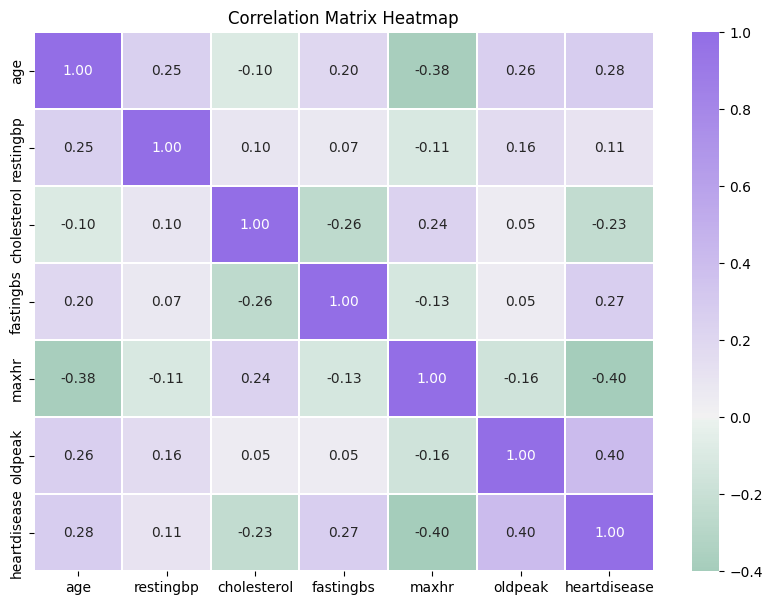

In [13]:
# Define the colors
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
# Create the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(numerical_columns.corr(), center=0, annot = True, cmap=colors, robust=True, linewidths=.1, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


Podemos observar que los valores de correlación entre las variables son débiles y moderados, sin encontrar características altamente relacionadas.

In [14]:
# Creamos lista con las columnas numericas sin la clase de salida
numerical_columns = numerical_columns.columns.to_list()
numerical_columns.pop(-1)
print(numerical_columns)

['age', 'restingbp', 'cholesterol', 'fastingbs', 'maxhr', 'oldpeak']


In [15]:
fig, axes = plt.subplots(6,2, figsize=(20,35))
sns.set_style('darkgrid')
idx = 0
for col in (numerical_columns):
    sns.kdeplot(data=df, x=col, palette='Greens',fill=True , hue='heartdisease',
                ax=axes[idx][0]).set_title(f'Distribution of {col}', fontsize='16')
    sns.boxplot(data=df, x=col, palette='flare' , y='heartdisease', orient='h',
                ax=axes[idx][1]).set_title(f'BoxPlot of {col}', fontsize='16')
    idx +=1
plt.show()

#### Exploración de columnas categóricas

In [16]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.to_list()

print(categorical_columns)


['sex', 'chestpaintype', 'restingecg', 'exerciseangina', 'st_slope']


In [17]:
fig = px.histogram(df , x="age"  , color="sex" , text_auto=True , marginal="box")
fig.update_layout(bargap=0.2)
fig.show()

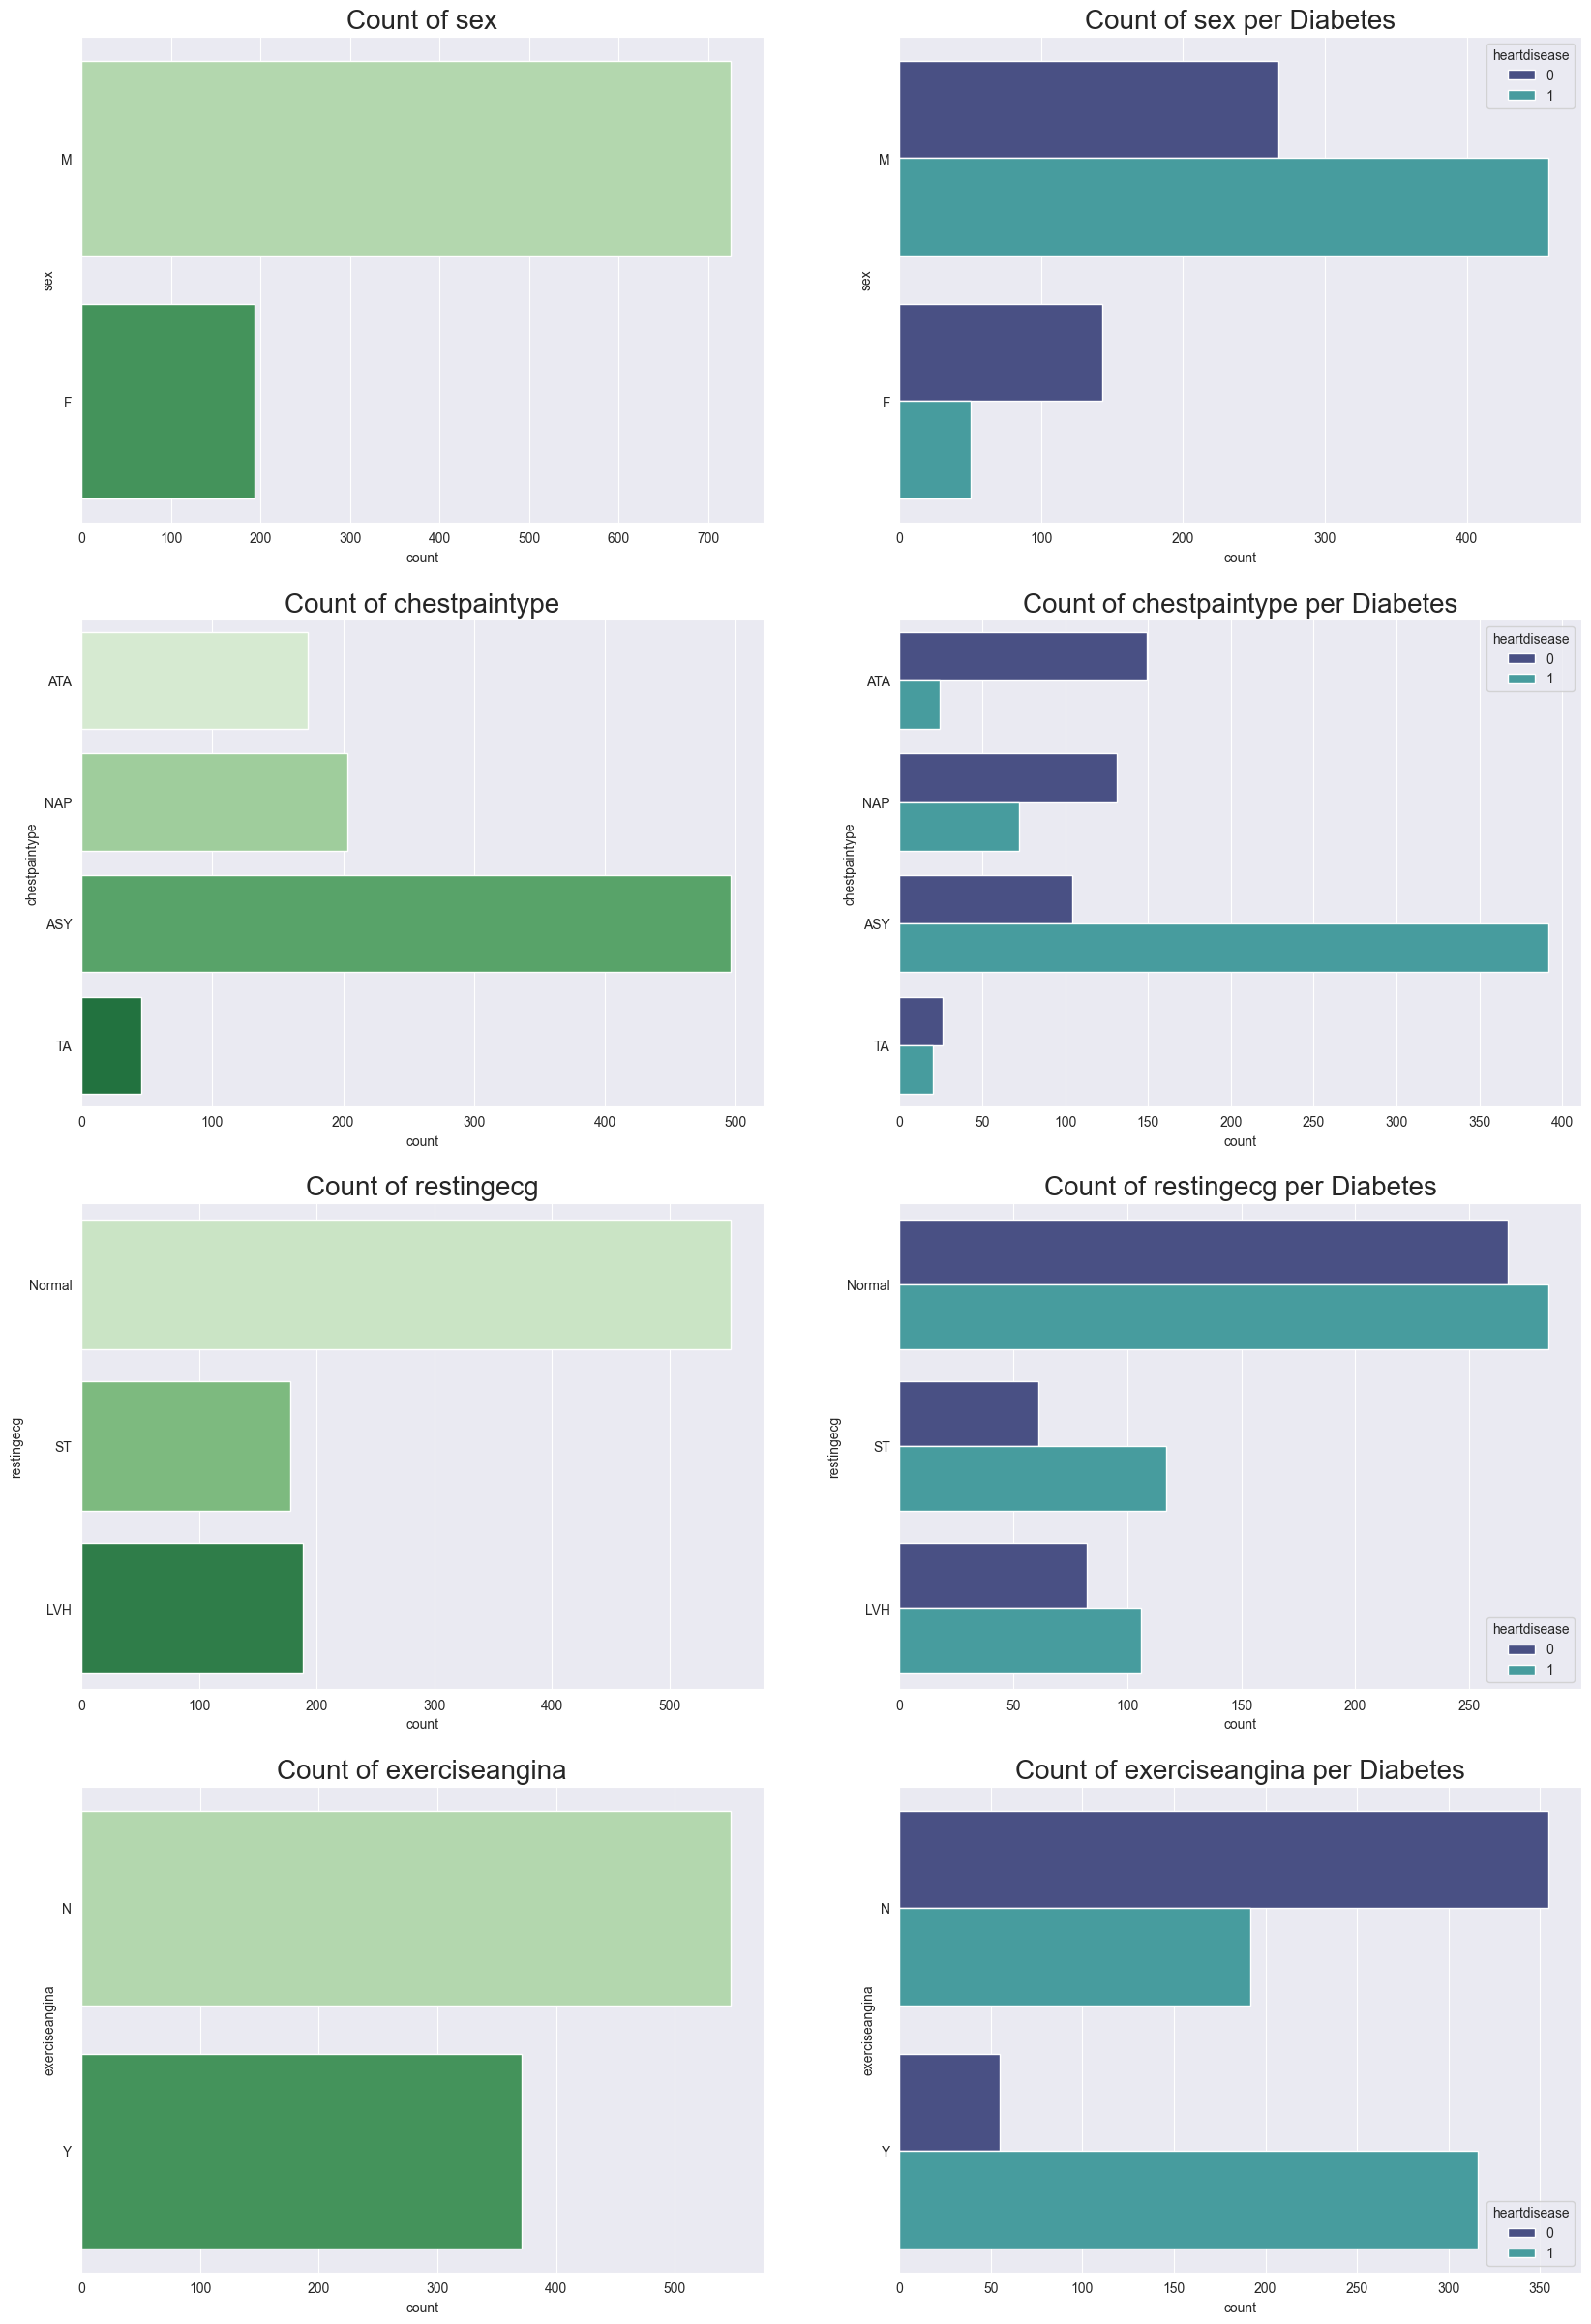

In [18]:
fig, axes = plt.subplots(4,2, figsize=(20,30))
sns.set_style('darkgrid')
idx = 0
#Cambiamos heartdisease a tipo str para poder realizar el grafico
df['heartdisease'] = df['heartdisease'].astype(str)
for col in categorical_columns:
    if idx < 4:
        sns.countplot(data=df, y=col, palette='Greens', orient='h',
                  ax=axes[idx][0]).set_title(f'Count of {col}', fontsize='20')
    
    if idx <4:    
        sns.countplot(data=df, y=col, palette='mako', orient='h',  hue='heartdisease',
                  ax=axes[idx][1]).set_title(f'Count of {col} per Diabetes', fontsize='20')
    idx +=1
plt.show()

#Volvemos heartdisease al tipo int
df['heartdisease'] = df['heartdisease'].astype(int)

In [19]:
fig = px.histogram(df , x="age" , color="restingecg", text_auto = True)
fig.update_layout(bargap = 0.2)
fig.show()

In [20]:
fig = px.histogram(df , x="chestpaintype" , color="sex", text_auto = True)
fig.update_layout(bargap = 0.2)
fig.show()

fig = px.histogram(df , x="chestpaintype" , color="heartdisease", text_auto = True)
fig.update_layout(bargap = 0.2)
fig.show()

In [21]:
fig = px.histogram(df , x="age" , color='exerciseangina', facet_col="restingecg" , text_auto=True)
fig.update_layout(bargap = 0.1)
fig.show()

fig = px.histogram(df , x="age" , color='st_slope', facet_col="exerciseangina" , text_auto=True)
fig.update_layout(bargap = 0.1)
fig.show()


#### Correlación entre variables

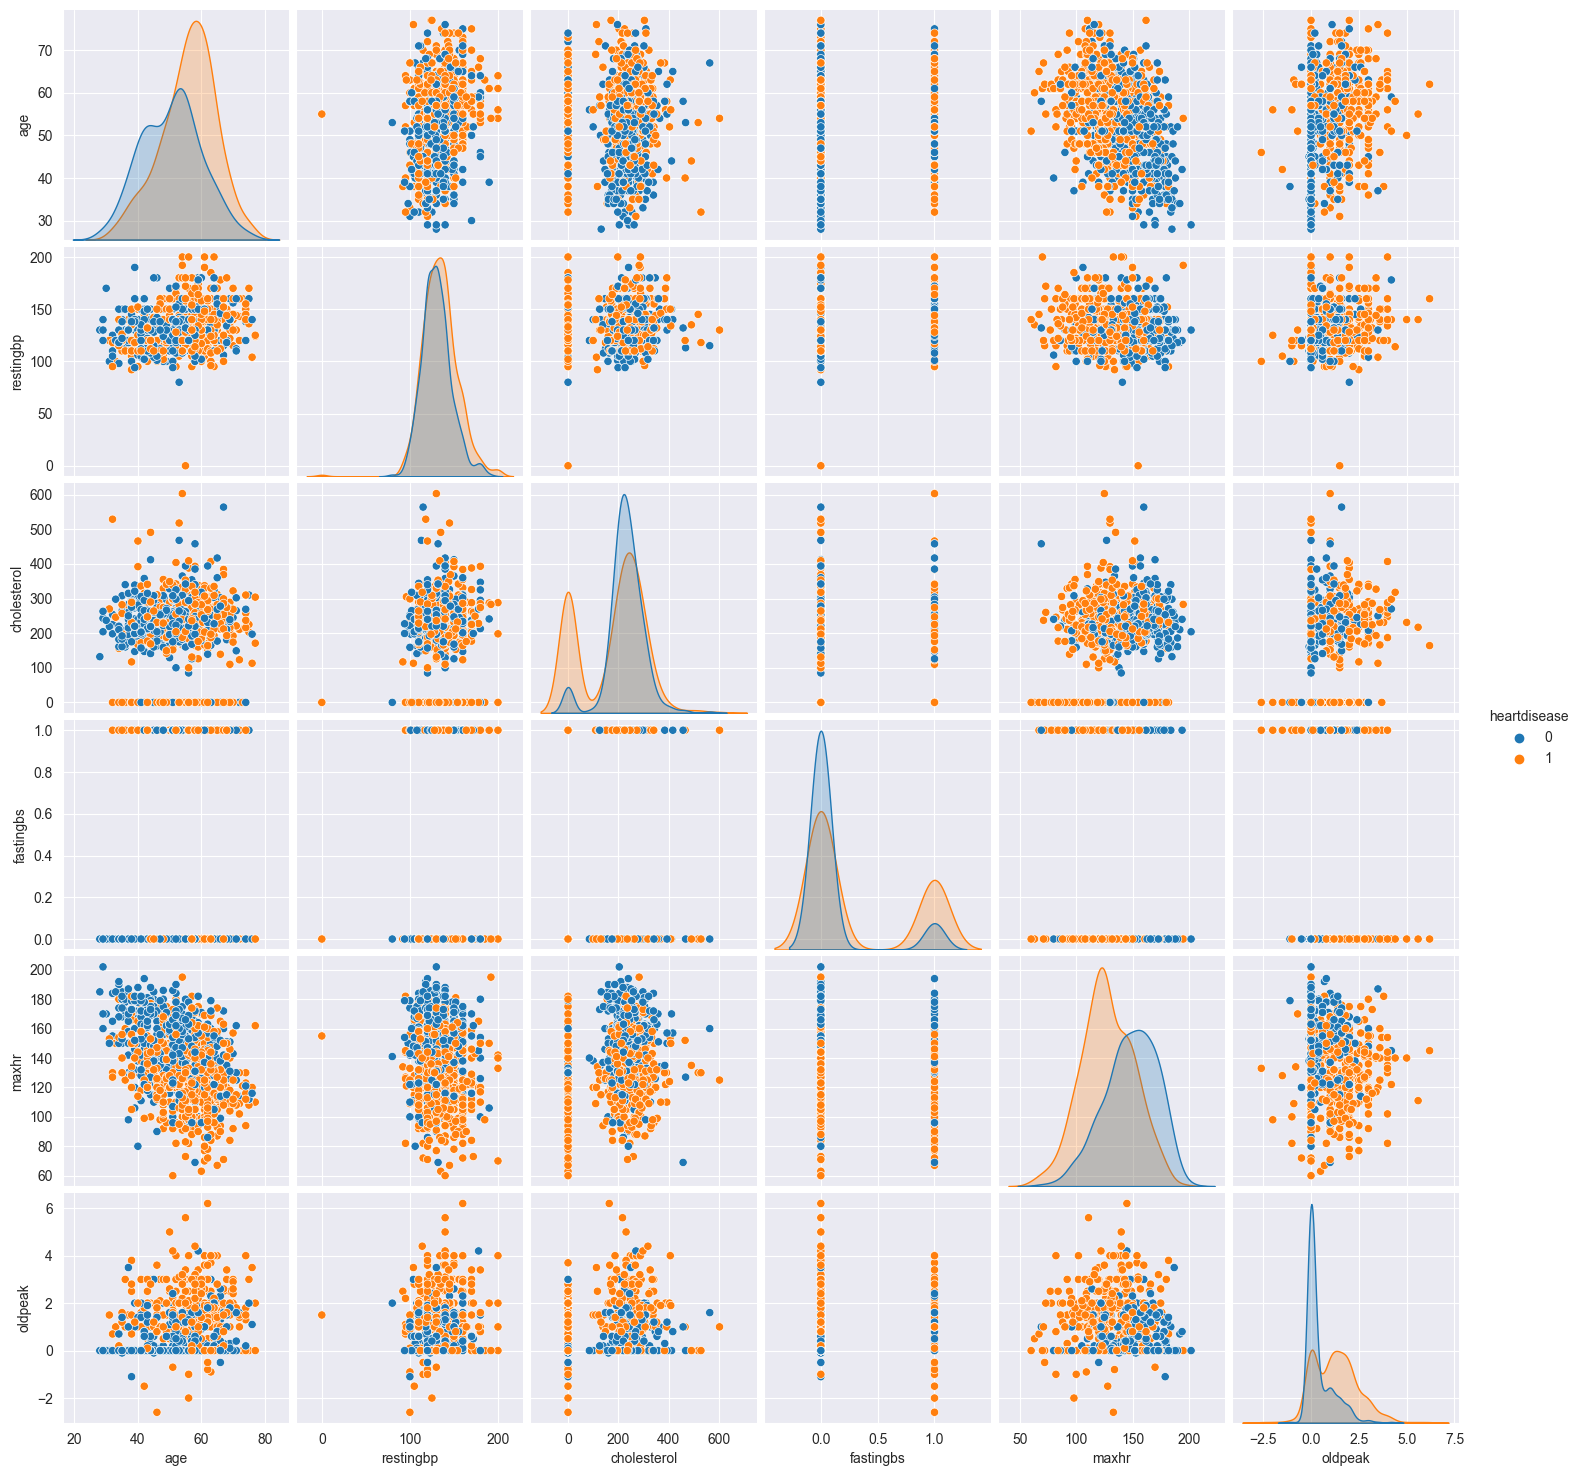

In [22]:
sns.pairplot(df, hue='heartdisease')
plt.show()

# Arbol de decisión

## Ajuste del modelo

In [23]:
#Seleccionamos variables
# Variables predictoras
X = df.drop(columns='heartdisease')
# Variable objetivo a predecir
Y = df.heartdisease

In [24]:
#Dividimos los datos en training y testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=123, test_size=0.2)

# One-hot-encoding de las variables categóricas
# ------------------------------------------------------------------------------
# Se identifica el nobre de las columnas numéricas y categóricas
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

# Se aplica one-hot-encoding solo a las columnas categóricas
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough'
               )

# Una vez que se ha definido el objeto ColumnTransformer, con el método fit()
# se aprenden las transformaciones con los datos de entrenamiento y se aplican a
# los dos conjuntos con transform(). Ambas operaciones a la vez con fit_transform().
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [25]:
#El resultado devuelto por ColumnTransformer es un numpy array, por lo que se pierden los nombres de las columnas.
#Por defecto, OneHotEncoder ordena las nuevas columnas de izquierda a derecha por orden alfabético.

# Convertir el output del ColumnTransformer en dataframe y añadir el nombre de las columnas
# ------------------------------------------------------------------------------
# Nombre de todas las columnas
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])

# Conversión a dataframe
X_train_prep = pd.DataFrame(X_train_prep, columns=labels)
X_test_prep  = pd.DataFrame(X_test_prep, columns=labels)
X_train_prep.info()
print(X_train_prep.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                734 non-null    float64
 1   restingbp          734 non-null    float64
 2   cholesterol        734 non-null    float64
 3   fastingbs          734 non-null    float64
 4   maxhr              734 non-null    float64
 5   oldpeak            734 non-null    float64
 6   sex_F              734 non-null    float64
 7   sex_M              734 non-null    float64
 8   chestpaintype_ASY  734 non-null    float64
 9   chestpaintype_ATA  734 non-null    float64
 10  chestpaintype_NAP  734 non-null    float64
 11  chestpaintype_TA   734 non-null    float64
 12  restingecg_LVH     734 non-null    float64
 13  restingecg_Normal  734 non-null    float64
 14  restingecg_ST      734 non-null    float64
 15  exerciseangina_N   734 non-null    float64
 16  exerciseangina_Y   734 non

In [26]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train_prep, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

In [27]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(13, 6))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = labels.tolist(),
            #Names of each of the target classes in ascending numerical order
            class_names   = ['sano', 'enfermo'],
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )

Profundidad del árbol: 5
Número de nodos terminales: 27


## Predicción y evaluación del modelo


Se evalúa la capacidad predictiva del árbol inicial observando la matriz de confusion y calculando el accuracy en el conjunto de test.

Una matriz de confusión resume cuántas predicciones acertadas y equivocadas hizo un modelo de machine learning en un conjunto de datos.
La precision o accuracy mide la exactitud de las predicciones positivas en relación con todas las predicciones, lo que proporciona una medida de cuán confiable es el modelo en clasificar correctamente los casos positivos.

In [28]:
# Error de test del modelo
#-------------------------------------------------------------------------------
predicciones = modelo.predict(X = X_test_prep,)

print("Matriz de confusión")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)

Matriz de confusión
-------------------


array([[69, 12],
       [20, 83]], dtype=int64)

In [29]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test del modelo inicial es: %{100 * accuracy} ")

El accuracy de test del modelo inicial es: %82.6086956521739 


### Recall (exhaustividad)

El recall nos da la tasa positiva verdadera, que es la proporción de los verdaderos positivos a todo lo positivo.
La exhaustividad proporciona una mejor manera de evaluar el rendimiento del modelo ante un desequilibrio de clases. Nos dirá correctamente que el modelo tiene poco valor para nuestro caso de uso. 
El recall es especialmente importante en situaciones donde identificar correctamente los casos positivos es crítico, como en pruebas médicas. Un recall alto indica que el modelo tiene una buena capacidad para detectar casos positivos, aunque puede haber más falsos positivos.

In [30]:
#Calculamos el recall
recall = recall_score(y_test, predicciones)

print(f"Recall del árbol de decisión: %{round(recall*100, 2)}")

Recall del árbol de decisión: %80.58


### F1 score 

La puntuación F1 es la media armónica de la precisión y recall, donde la puntuación de la F1 alcanza su mejor valor en 1 (precisión y exhaustividad perfectas) y el peor en 0.


In [31]:
#F1 score
score = f1_score(predicciones, y_test)

print (f"F1 score del árbol de decisión: %{round(score*100, 2)}")

F1 score del árbol de decisión: %83.84


### Bias y Varianza

El Bias o sesgo es un tipo de error que indica la diferencia que existe entre la predicción del modelo y el valor actual. Si el modelo tiene un Bias alto significa que le presta poca atención a los datos y sobre simplifica el modelo. Esto nos lleva a tener un error alto tanto en training como en test.

La varianza es un error que lo podemos entender como que tan sensible es nuestro modelo a los datos. Si tenemos exceso de sensibilidad el modelo puede creer ver patrones que realmente no existen ahí. En el contexto de estadística es una medida de dispersión de los datos, es la distancia de cada variable a la media de todas las variables. Si tenemos un valor de varianza alto significa que el modelo le presta mucha atención a los datos de entrenamiento y no va a generalizar bien en datos que no ha visto. Esto lo podemos ver cuando en el entrenamiento el modelo funciona muy bien pero tiene mucho error en el test.

In [32]:
#Calculamos el error irreducible, el bias y la varianza
# Calcular sesgo y varianza

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        modelo, X_train_prep.values, y_train.values, X_test_prep.values, y_test.values, 
        loss='0-1_loss',
        random_seed=123)

print(f'Promedio de error irreducible: {round(avg_expected_loss, 3)}')
print(f'Promedio de bias: {round(avg_bias, 3)}')
print(f'Prmedio de varianza: {round(avg_var, 3)}')

Promedio de error irreducible: 0.189
Promedio de bias: 0.152
Prmedio de varianza: 0.091


### Conclusion de la evaluación del modelo

Observamos que el modelo tiene una precisión de %82.6 y un recall de %80.58, concluyendo en un F1 score de %83.84. Estas medidas sugieren que el modelo tiene una buena capacidad para identificar casos positivos. Además, obtenemos valores aceptables en el bias (0.152) y varianza (0.091). Lo cual nos indican que el modelo no está sesgado por el conjunto de entrenamiento.

Pero considerando las necesidades y riesgos específicos del problema médico que estamos trabajando, un falso negativo podría tener consecuencias graves y estos resultados podrían no ser suficientes. Por lo que buscaremos optimizar el modelo con un proceso de pruning.

## Podado del árbol (pruning)

Inicialmente se ha empleado un valor de max_depth=5, pero puede no ser el mejor valor. Con el objetivo de identificar la profundidad óptima que consigue reducir la varianza y aumentar la capacidad predictiva del modelo, se somete al árbol a un proceso de pruning.

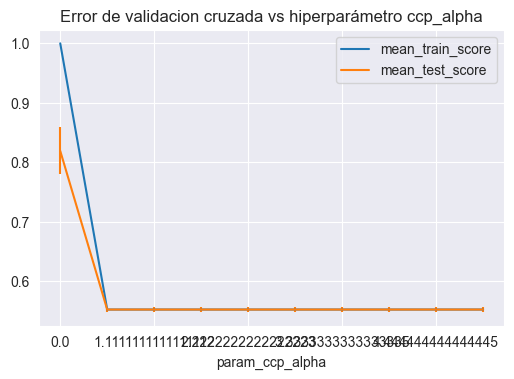

In [33]:
# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 5, 10)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train_prep, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [34]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_

{'ccp_alpha': 0.0}

In [35]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

Profundidad del árbol: 14
Número de nodos terminales: 98


In [36]:
# Error de test del modelo final
#-------------------------------------------------------------------------------
predicciones_final = modelo_final.predict(X = X_test_prep)

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones_final,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 80.97826086956522 %


In [37]:

print("Matriz de confusión")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones_final
)

Matriz de confusión
-------------------


array([[65, 16],
       [19, 84]], dtype=int64)

In [38]:
#Calculamos el recall
recall = recall_score(y_test, predicciones_final)

print(f"Recall del árbol de decisión: %{round(recall*100, 2)}")

Recall del árbol de decisión: %81.55


In [39]:
#F1 score
score = f1_score(predicciones_final, y_test)

print (f"F1 score del árbol de decisión: %{round(score*100, 2)}")

F1 score del árbol de decisión: %82.76


In [40]:
#Calculamos el error irreducible, el bias y la varianza
# Calcular sesgo y varianza

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        modelo_final, X_train_prep.values, y_train.values, X_test_prep.values, y_test.values, 
        loss='0-1_loss',
        random_seed=123)

print(f'Promedio de error irreducible: {round(avg_expected_loss, 3)}')
print(f'Promedio de bias: {round(avg_bias, 3)}')
print(f'Prmedio de varianza: {round(avg_var, 3)}')

Promedio de error irreducible: 0.215
Promedio de bias: 0.141
Prmedio de varianza: 0.134


### Conclusión tras el proceso de poda

Tras el proceso de poda del modelo, observamos que las métricas de rendimiento han mostrado un deterioro en comparación con el modelo original. Podemos hacer una comparación:

| Modelo           | Matriz de Confusión        | Precisión | Recall  | F1 Score | Bias  | Varianza |
|------------------|---------------------------|-----------|---------|----------|-------|----------|
| Primer Modelo    | [[69, 12], \ [20, 83]]     | %82.6    | %80.58  | %83.84   | 0.152 | 0.091    |
| Segundo Modelo   | [[65, 16], \ [19, 84]]     | %80.9    | %81.55  | %82.76   | 0.141 | 0.134    |

Esto sugiere que la poda no condujo a una mejora en la capacidad predictiva del modelo, sino más bien a una disminución en su desempeño.

# -----------------------------------------------------------------------------

## Conclusión final

Después de evaluar ambos modelos y considerar las métricas de rendimiento, concluí que el primer modelo demuestra una capacidad predictiva más sólida y satisfactoria.
No obstante, como mencionamos anteriormente, a pesar de que las métricas nos brindan resultados satisfactorios, en el contexto actual, donde buscamos predecir qué pacientes padecen enfermedades cardiovasculares, existe el riesgo de que el modelo indique que un paciente está sano cuando en realidad tiene una enfermedad. 

También es posible que el arbol de decisión no sea el modelo adecuado para realizar esta predicción, por lo que el siguiente paso a seguir es probar con otros modelos y encontrar uno más apropiado.

